# PCA
The second step in Rat MoSeq is to reduce the number of dimensions of the data before modeling them. This is important for a number of reasons, but primarily it allows us to model the data easier with the underlying MoSeq algorithm.

### Cleaning data
Before performing PCA we clean the data from any noise and smooth the animal (TODO: include size norm). Below shows what the data look like after performing that cleaning, this is accomplished with simple traditional computer vision techniques like thresholing and morphological operations. Read more here: TODO include openCV link

In [9]:
import h5py
from pathlib import Path
from moseq2_pca.util import clean_frames
import matplotlib.pyplot as plt

In [14]:
pdir = Path('/n/groups/datta/jlove/data/rat_seq/rat_seq_paper/data/9weeks/scn2a/cohort13/session_20240725113325')
results_file = pdir / 'proc/results_00.h5'

# read in the first 10 frames from the result of the extraction
with h5py.File(results_file, 'r') as f:
    frames = f['frames'][:10].astype('int16')

In [16]:
# perform cleaning with various smoothing parameters
cleaned_small_gauss = clean_frames(frames, gaussfilter_space = (1, 1))
cleaned_med_gauss = clean_frames(frames, gaussfilter_space = (3, 1))
cleaned_big_gauss = clean_frames(frames, gaussfilter_space = (10, 1))

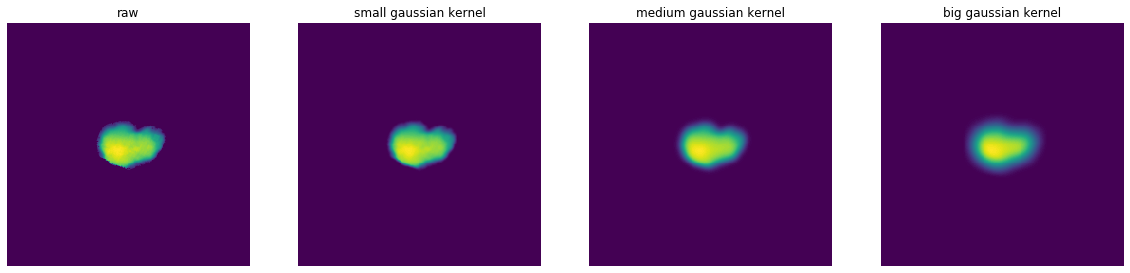

In [23]:
# visualization
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

ax[0].imshow(frames[0])
ax[0].set_title('raw')

ax[1].imshow(cleaned_small_gauss[0])
ax[1].set_title('small gaussian kernel')

ax[2].imshow(cleaned_med_gauss[0])
ax[2].set_title('medium gaussian kernel')

ax[3].imshow(cleaned_big_gauss[0])
ax[3].set_title('big gaussian kernel')

for _a in ax:
    _a.axis('off')

## Performing PCA
PCA is computationally intense and takes a lot of data, so we aren't going to load the data and run the code block to accomplish that here. The two commands below automate that along with cleaning. Pretty much we want to take a matrix that is of the shape time x width x height and transform it to time x 10 PCs. The 10 PCs should explain ~90% of the variance, and we can check that by looking in the `_pca` directory generated after running the below commands

In [ ]:
%%bash
moseq2-pca train-pca \
    -i /n/groups/datta/jlove/data/rat_seq/rat_seq_paper/data/14weeks \
    -o /n/groups/datta/jlove/data/rat_seq/rat_seq_paper/data/14weeks/_pca \
    --h5-path frames --gaussfilter-space 3 1 --tailfilter-size 5 5 --rank 20 

In [ ]:
%%bash
moseq2-pca train-apply \
    -i /n/groups/datta/jlove/data/rat_seq/rat_seq_paper/data/14weeks \
    -o /n/groups/datta/jlove/data/rat_seq/rat_seq_paper/data/14weeks/_pca \
    --h5-path frames

#TODO add results images